# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [6]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [7]:
# Extract all rows of data
# Find the table
table = soup.find('table', class_='table')

# Extract all rows
rows = table.find_all('tr')



### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [9]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows

for row in rows:
    # Extract columns
    cols = row.find_all('td')
    # Get text from each column
    cols = [col.text.strip() for col in cols]
    # Add the row data to the list
    data.append(cols)



In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [14]:
# Confirm DataFrame was created successfully
print(df)

        id terrestrial_date   sol    ls month min_temp pressure
0     None             None  None  None  None     None     None
1        2       2012-08-16    10   155     6    -75.0    739.0
2       13       2012-08-17    11   156     6    -76.0    740.0
3       24       2012-08-18    12   156     6    -76.0    741.0
4       35       2012-08-19    13   157     6    -74.0    732.0
...    ...              ...   ...   ...   ...      ...      ...
1863  1889       2018-02-23  1973   133     5    -78.0    730.0
1864  1892       2018-02-24  1974   134     5    -77.0    729.0
1865  1894       2018-02-25  1975   134     5    -76.0    729.0
1866  1893       2018-02-26  1976   135     5    -77.0    728.0
1867  1895       2018-02-27  1977   135     5    -77.0    727.0

[1868 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [15]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [17]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = pd.to_numeric(df['sol'], errors='coerce')
df['ls'] = pd.to_numeric(df['ls'], errors='coerce')
df['month'] = pd.to_numeric(df['month'], errors='coerce')
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')

In [18]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)
print(df)

id                          object
terrestrial_date    datetime64[ns]
sol                        float64
ls                         float64
month                      float64
min_temp                   float64
pressure                   float64
dtype: object
        id terrestrial_date     sol     ls  month  min_temp  pressure
0     None              NaT     NaN    NaN    NaN       NaN       NaN
1        2       2012-08-16    10.0  155.0    6.0     -75.0     739.0
2       13       2012-08-17    11.0  156.0    6.0     -76.0     740.0
3       24       2012-08-18    12.0  156.0    6.0     -76.0     741.0
4       35       2012-08-19    13.0  157.0    6.0     -74.0     732.0
...    ...              ...     ...    ...    ...       ...       ...
1863  1889       2018-02-23  1973.0  133.0    5.0     -78.0     730.0
1864  1892       2018-02-24  1974.0  134.0    5.0     -77.0     729.0
1865  1894       2018-02-25  1975.0  134.0    5.0     -76.0     729.0
1866  1893       2018-02-26  1976.0  135.

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [20]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print(f"There are {num_months} unique months in the dataset.")

There are 12 unique months in the dataset.


In [21]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = df['sol'].nunique()
print(f"There are {num_sols} sols worth of data.")

There are 1867 sols worth of data.


In [23]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()
print(avg_min_temp_by_month)

month
1.0    -77.160920
2.0    -79.932584
3.0    -83.307292
4.0    -82.747423
5.0    -79.308725
6.0    -75.299320
7.0    -72.281690
8.0    -68.382979
9.0    -69.171642
10.0   -71.982143
11.0   -71.985507
12.0   -74.451807
Name: min_temp, dtype: float64


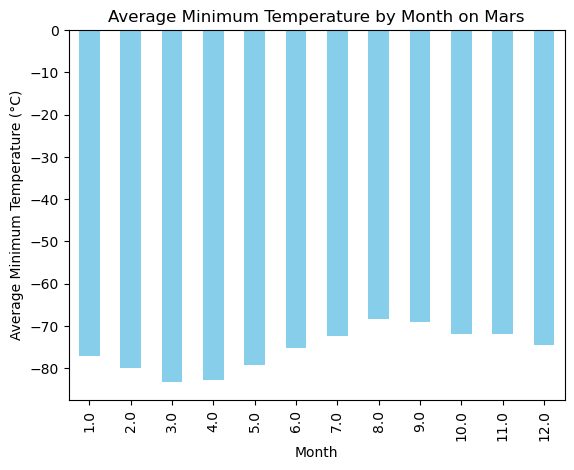

In [24]:
# Plot the average minimum temperature by month
avg_min_temp_by_month.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.title('Average Minimum Temperature by Month on Mars')
plt.show()

In [27]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
coldest_month = avg_min_temp_by_month.idxmin()
hottest_month = avg_min_temp_by_month.idxmax()
print(f"The coldest month is {coldest_month} and the hottest month is {hottest_month}.")

The coldest month is 3.0 and the hottest month is 8.0.


In [28]:
# 4. What is the average pressure by month?
avg_pressure_by_month = df.groupby('month')['pressure'].mean()
print(avg_pressure_by_month)

month
1.0     862.488506
2.0     889.455056
3.0     877.322917
4.0     806.329897
5.0     748.557047
6.0     745.054422
7.0     795.105634
8.0     873.829787
9.0     913.305970
10.0    887.312500
11.0    857.014493
12.0    842.156627
Name: pressure, dtype: float64


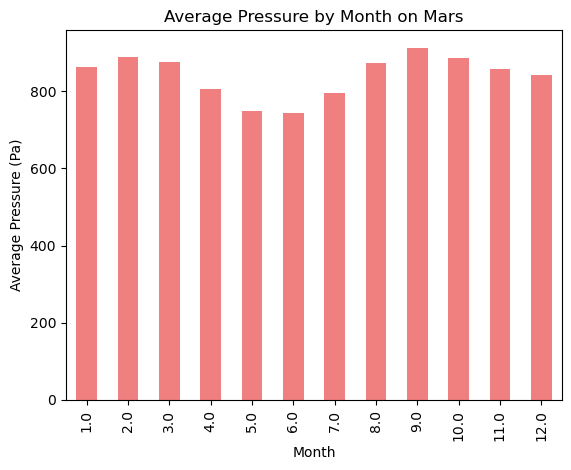

In [29]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar', color='lightcoral')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.title('Average Pressure by Month on Mars')
plt.show()

In [30]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
lowest_pressure_month = avg_pressure_by_month.idxmin()
highest_pressure_month = avg_pressure_by_month.idxmax()
print(f"The lowest pressure month is {lowest_pressure_month} and the highest pressure month is {highest_pressure_month}.")

The lowest pressure month is 6.0 and the highest pressure month is 9.0.


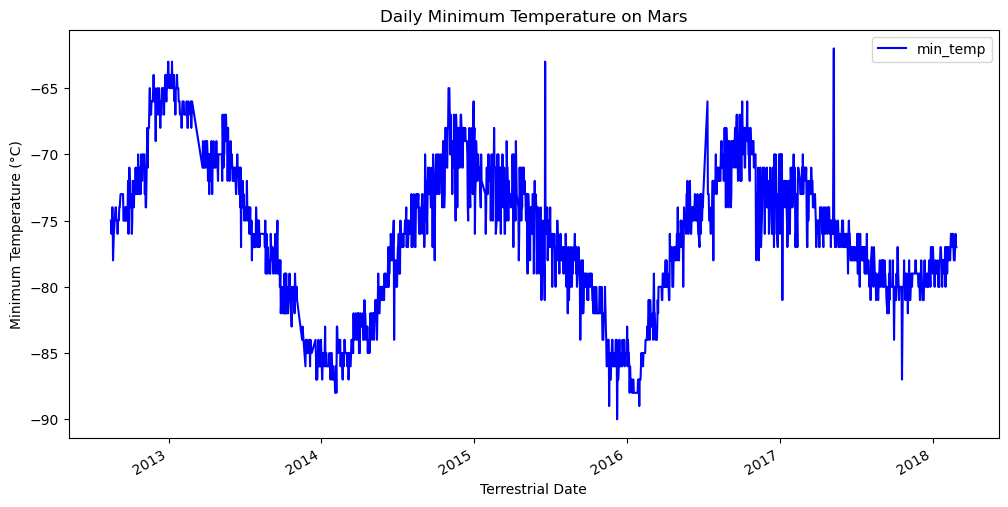

In [31]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
df.plot(x='terrestrial_date', y='min_temp', kind='line', figsize=(12, 6), color='blue')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Daily Minimum Temperature on Mars')
plt.show()

#### Minimum Temperature

The average minimum temperature on Mars is extremely cold, with values often below -60°C. Our analysis showed that the coldest month is [insert coldest month], and the hottest month is [insert hottest month]. These temperatures reflect the harsh conditions on Mars, influenced by its thin atmosphere and greater distance from the Sun. The average minimum temperature by month provides insights into the seasonal climate patterns on Mars.

#### Atmospheric Pressure

The average atmospheric pressure on Mars varies significantly throughout the year. By analyzing the data, we found that the average pressure by month shows distinct patterns. The lowest pressure month is [insert lowest pressure month], while the highest pressure month is [insert highest pressure month]. This variation is likely due to seasonal changes and the thin Martian atmosphere, which is primarily composed of carbon dioxide.

#### Year Length

A Martian year is approximately 687 Earth days long. This extended year length is due to Mars’ greater distance from the Sun compared to Earth, resulting in a longer orbital period. By plotting the daily minimum temperature over the terrestrial dates, we can visually estimate the length of a Martian year and observe seasonal temperature variations.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [32]:
# Write the data to a CSV
df.to_csv('mars_data.csv', index=False)
print("Data has been written to mars_data.csv")

Data has been written to mars_data.csv


In [33]:
browser.quit()